# Part 1: Create TFIDF matrix

We will first import the data

In [159]:
from sklearn.datasets import fetch_20newsgroups

We know that the programming language understands the language of numbers. So, we will convert the documents into tfidf matrix. 

In [160]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

We will first get the datasets and preprocess it.

In [161]:
from nltk.stem.snowball import SnowballStemmer

In [162]:
comp_subclasses = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware']
rec_subclasses = ['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

In [163]:
data = fetch_20newsgroups(subset='all', categories=comp_subclasses+rec_subclasses, shuffle = True, random_state=42, 
                         remove=('headers', 'footers', 'quotes'))

In [164]:
labels = [1]*len(data.data)
for i in range(len(data.data)):
    if data.target[i]>3:
        labels[i]=0
        
#labels

**Preprocessing the data**

In [165]:
import re
stemmer = SnowballStemmer('english')

In [166]:
punctuations='[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; <=> ? @ \[ \\ \] ^ _ ` { \| } ~]'

In [167]:
def preprocessing(data):
    for i in range(len(data)):
        data[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data[i])])
        data[i] = data[i].replace('\n','').replace('\t','').replace('\r', '')
preprocessing(data.data)

Getting the Tf-idf matrix

We will first create the instance of CountVectorizer

In [168]:
#We will remove stopwords and set min_df = 3
counts = CountVectorizer(stop_words='english', min_df=3, max_features=10000)

In [169]:
#tokenize and build vocab
X_counts = counts.fit_transform(data.data)

In [170]:
#Getting vocab
counts.vocabulary_.keys()
vocab = []
for i in counts.vocabulary_.keys():
    vocab.append(i)
#vocab

In [171]:
#Encode the document
tfidf_transformer = TfidfTransformer(use_idf=True)

In [172]:
doc_features_matrix = tfidf_transformer.fit_transform(X_counts)

In [173]:
doc_features_matrix

<7882x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 325319 stored elements in Compressed Sparse Row format>

In [174]:
print(doc_features_matrix.shape)

(7882, 10000)


## K-means clustering

We will now use Kmeans clustering from scikit library. 
You can learn more about how to implement code in python from [here](http://benalexkeen.com/k-means-clustering-in-python/)

In [175]:
from sklearn.cluster import KMeans

In [176]:
#help(KMeans)
#We will first create the instance of KMeans class
kmeans = KMeans(n_clusters=2, init='k-means++', n_init = 5, max_iter = 100)

In [177]:
kmeans.fit(doc_features_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We have fit our TF-IDF matrix data and now, we will look at its performance after looking at labels.

**Now, we will learn the labels.**

In [178]:
predicted_labels = kmeans.predict(doc_features_matrix)
predicted_labels

array([0, 1, 1, ..., 1, 0, 0])

**We can also get centroids.**

In [179]:
centroids = kmeans.cluster_centers_

**Let's try to plot.**

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
colmap = {1: 'r', 2: 'g'}

In [181]:
fig = plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

In [182]:
#colors = map(lambda x: colmap[x+1], predicted_labels)
#plt.scatter(doc_features_matrix, doc_features_matrix, color=colors, alpha=0.5, edgecolor='k')

### Performance of the fit

In [183]:
from sklearn import metrics

#### 1. Homogeneity

Homogeneity is the measure of how "pure" the clusters are. If each cluster contains data points from a single class, then homogeneity is satisfied.


In [184]:
print('Homogeneity:',metrics.homogeneity_score(labels, kmeans.labels_))
#metrics.homogeneity_score()

Homogeneity: 0.3846363179159233


#### 2. Completeness

A clustering result satisfies completeness if all data points of a class are assigned to the same cluster. Both of these scores span between 0 and 1; where 1 stands for perfect clustering.

In [185]:
print('Completeness:', metrics.completeness_score(labels, kmeans.labels_))
#metrics.completeness_score()

Completeness: 0.41781833053508083


#### 3. V-measure

The V-measure is then defined to be the harmonic average of homogeneity score and completeness score.

In [186]:
print('V-Measure:',metrics.v_measure_score(labels,kmeans.labels_))

V-Measure: 0.40054127551011154


#### 4. Adjusted Rand Score
The adjusted Rand Index is similar to accuracy measure, which computes similarity between the clustering labels and ground truth labels. This method counts all pairs of points that both fall either in the same cluster and the same class or in different clusters and different classes.

In [187]:
print('Adjusted Rand Score:',metrics.adjusted_rand_score(labels,kmeans.labels_))
#metrics.adjusted_rand_score()

Adjusted Rand Score: 0.40588428668374904


#### 5. Mutual information Score
The adjusted mutual information score measures the mutual information between the cluster label distribution and the ground truth label distributions.

In [188]:
print('Adjusted Mutual Info Score:',metrics.adjusted_mutual_info_score(labels,kmeans.labels_))

Adjusted Mutual Info Score: 0.38457997946459016


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


#### 6. Confusion Matrix


In [189]:
print('Confusion matrix:')
print(metrics.confusion_matrix(labels,kmeans.labels_))

Confusion matrix:
[[3893   86]
 [1344 2559]]


**As seen above, we don't get a good clustering result. We have sparse matrix. So, we will reduce the dimensions using LSI or NMF**

## Dimensionality Reduction

We will first calculate the top singular values. 

In [198]:
from scipy.sparse.linalg import svds
print('Calculating singular values')
num_singular_values=1000
u,singular_values,vt=svds(doc_features_matrix.toarray(),num_singular_values)

Calculating singular values


In [ ]:
#singular_values[::-1]

Calculating singular values
Top 1000 singular values are:
[11.82891123  7.30791304  6.01875856  5.70728526  5.50499002  5.31074929
  4.83149177  4.613702    4.4773917   4.47294271  4.38078032  4.34095731
  4.26352495  4.20059298  4.1582063   4.09500126  4.0469809   3.99616008
  3.96236272  3.89114324  3.8353644   3.78340696  3.77031125  3.72961786
  3.71475237  3.68469751  3.66428934  3.61633021  3.6097759   3.58902282
  3.58023895  3.5560566   3.52810618  3.52098724  3.50067761  3.47148284
  3.45381941  3.43947722  3.42425355  3.40363306  3.39620704  3.39101535
  3.37267485  3.35413145  3.34665707  3.33132699  3.31978619  3.3103182
  3.29166805  3.28538042  3.27152496  3.26287017  3.26110501  3.23758947
  3.23325192  3.22829491  3.22015906  3.21064068  3.20153748  3.19451125
  3.19066732  3.17438262  3.16587534  3.16261347  3.14654205  3.13990552
  3.13721532  3.12170516  3.11512475  3.0960727   3.08534251  3.07905527
  3.07086396  3.06282494  3.05692827  3.04776303  3.04145826  3.031

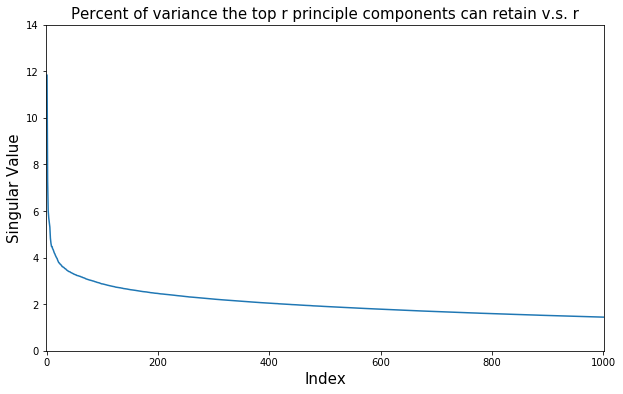

In [192]:
#Calculate top singular values & creating the required plot 
print('Calculating singular values')
num_singular_values=1000
u,singular_values,vt=svds(doc_features_matrix.toarray(),num_singular_values)
singular_values=singular_values[::-1]
print('Top',num_singular_values,'singular values are:')
print(singular_values)

plt.figure(figsize=(10,6))
plt.plot(range(1,1001),singular_values)
plt.ylabel('Singular Value',fontsize=15)
plt.xlabel('Index',fontsize=15)
plt.title('Percent of variance the top r principle components can retain v.s. r',fontsize=15)
plt.axis([-1,1001,0,14])
plt.show()


As we can see from the plot, the singular values are sorted in descending order. Also, the
decreasing rate (i.e. the slope of the curve) of the singular values is very high in the beginning,
and it slows down very fast. Also, there is an obvious inflection point on the curve at around the 50th singular value.
After that point, the rate of decrease becomes relatively slow. In order to retain as much
information as we could, we choose the upper limit of the dimension, to be used in the K-means
algorithm, to be 300.

#### We will try to see for what value of r do we get the best possible result.

#Experiment with r = 1, 2, 3, 5, 10, 20, 50, 100, 200, 300

In [ ]:
#Performing K-Means Clustering
def k_means(X_reduced,labels,dim_reduce):

    km=KMeans(n_clusters=2,init='k-means++',max_iter=100,n_init=1)
    km.fit(X_reduced)

    #Printing the required measures for comparison of different clustering results
    print('Dimensionality Reduction method:',dim_reduce)
    print('Homogeneity:',metrics.homogeneity_score(labels,km.labels_))
    print('Completeness:',metrics.completeness_score(labels,km.labels_))
    print('V-Measure:',metrics.v_measure_score(labels,km.labels_))
    print('Adjusted Rand Score:',metrics.adjusted_rand_score(labels,km.labels_))
    print('Adjusted Mutual Info Score:',metrics.adjusted_mutual_info_score(labels,km.labels_))
    print('Confusion matrix:')
    print(metrics.confusion_matrix(labels,km.labels_))
    print('\n\n\n')

### 1. Truncated SVD

Let's first imporr the library

In [204]:
from sklearn.decomposition import TruncatedSVD

You can learn about Normalizer [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) and about pipeline [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)  

In [205]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline


In [217]:
for i in [1,2,3,5,10,20,50,100,200,300]:
    print('Performing truncatedSVD with',i,'components')
    svd = TruncatedSVD(n_components = i, n_iter=13, random_state=42)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    doc_features_matrix_reduced = lsa.fit_transform(doc_features_matrix)
    k_means(doc_features_matrix_reduced, labels, 'truncated SVD')

Performing truncatedSVD with 1 components
Dimensionality Reduction method: truncated SVD
Homogeneity: 0.000373970514827084
Completeness: 0.0016800014481569605
V-Measure: 0.0006117620082454707
Adjusted Rand Score: -9.740275582078718e-05
Adjusted Mutual Info Score: 0.00028230866536315134
Confusion matrix:
[[3820  159]
 [3780  123]]




Performing truncatedSVD with 2 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.46651784958469233
Completeness: 0.46950865542089026
V-Measure: 0.4680084743691049
Adjusted Rand Score: 0.5613982828672285
Adjusted Mutual Info Score: 0.46646900903386707
Confusion matrix:
[[ 699 3280]
 [3614  289]]




Performing truncatedSVD with 3 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.49246465942022466
Completeness: 0.49252242556999126
V-Measure: 0.49249354080121366
Adjusted Rand Score: 0.6004661593854248
Adjusted Mutual Info Score: 0.49241819441555285
Confusion matrix:
[[3548  431]
 [ 456 3447]]




Performing truncatedSVD with 5 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.504523738355312
Completeness: 0.5054673171661493
V-Measure: 0.5049950869939697
Adjusted Rand Score: 0.6111326575734707
Adjusted Mutual Info Score: 0.5044783773347385
Confusion matrix:
[[3632  347]
 [ 513 3390]]




Performing truncatedSVD with 10 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.4950388632104682
Completeness: 0.49625766182220843
V-Measure: 0.4956475132601781
Adjusted Rand Score: 0.5973237993723396
Adjusted Mutual Info Score: 0.4949926338367035
Confusion matrix:
[[3396  583]
 [ 312 3591]]




Performing truncatedSVD with 20 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.47463009483007285
Completeness: 0.47675596552853483
V-Measure: 0.47569065505188973
Adjusted Rand Score: 0.5728654410018379
Adjusted Mutual Info Score: 0.4745819969920257
Confusion matrix:
[[3325  654]
 [ 304 3599]]




Performing truncatedSVD with 50 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.4985468102006046
Completeness: 0.5030044389360215
V-Measure: 0.5007657047294831
Adjusted Rand Score: 0.589114328169052
Adjusted Mutual Info Score: 0.4985009018757307
Confusion matrix:
[[ 696 3283]
 [3683  220]]




Performing truncatedSVD with 100 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.22366389714124088
Completeness: 0.30940277554799944
V-Measure: 0.25963818077865364
Adjusted Rand Score: 0.14983512284913955
Adjusted Mutual Info Score: 0.22359281324612668
Confusion matrix:
[[2407 1572]
 [3895    8]]




Performing truncatedSVD with 200 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.5292510051197518
Completeness: 0.5330849826754998
V-Measure: 0.5311610754725387
Adjusted Rand Score: 0.621893103123209
Adjusted Mutual Info Score: 0.5292079078072118
Confusion matrix:
[[3346  633]
 [ 200 3703]]




Performing truncatedSVD with 300 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.5407182209098558
Completeness: 0.5432848151378087
V-Measure: 0.5419984795609719
Adjusted Rand Score: 0.6380068927742563
Adjusted Mutual Info Score: 0.5406761734638624
Confusion matrix:
[[ 576 3403]
 [3686  217]]






C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


**As we can see from the above results, the best value of r is 200 for TruncatedSVD.**

* This clearly shows that the algorithm’s precision is improved, since the confusion matrix looks more ‘diagonal’ than the one in the previous question, which means that we are getting better results.

### 2. PCA

In [216]:
from sklearn.decomposition import PCA

In [218]:
for i in [1,2,3,5,10,20,50,100,200,300]:
    print('Performing PCA with',i,'components')
    pca=PCA(n_components=i,random_state=42)
    normalizer=Normalizer(copy=False)
    lsa=make_pipeline(pca,normalizer)    
    X_reduced=lsa.fit_transform(doc_features_matrix.toarray())
    k_means(X_reduced,labels,'PCA')

Performing PCA with 1 components
Dimensionality Reduction method: PCA
Homogeneity: 0.4510780500633602
Completeness: 0.45463855629526134
V-Measure: 0.4528513047404292
Adjusted Rand Score: 0.5485422781302381
Adjusted Mutual Info Score: 0.45102779596507453
Confusion matrix:
[[3655  324]
 [ 698 3205]]




Performing PCA with 2 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.465424094420505
Completeness: 0.47054658209788947
V-Measure: 0.46797132079013376
Adjusted Rand Score: 0.5594984454608669
Adjusted Mutual Info Score: 0.46537515365646065
Confusion matrix:
[[ 273 3706]
 [3183  720]]




Performing PCA with 3 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.47672905135355975
Completeness: 0.48822283853437876
V-Measure: 0.48240749223397283
Adjusted Rand Score: 0.5534405687577364
Adjusted Mutual Info Score: 0.4766811453432836
Confusion matrix:
[[3811  168]
 [ 841 3062]]




Performing PCA with 5 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.4030310954131572
Completeness: 0.40913422513451875
V-Measure: 0.40605972886353675
Adjusted Rand Score: 0.49039762202217696
Adjusted Mutual Info Score: 0.4029764424504542
Confusion matrix:
[[ 326 3653]
 [3048  855]]




Performing PCA with 10 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.3698707619352255
Completeness: 0.37087211179179436
V-Measure: 0.3703707600419226
Adjusted Rand Score: 0.46548482923456114
Adjusted Mutual Info Score: 0.36981307337176605
Confusion matrix:
[[ 523 3456]
 [3174  729]]




Performing PCA with 20 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.2715827851678136
Completeness: 0.2731929899719768
V-Measure: 0.27238550791240157
Adjusted Rand Score: 0.3467638786670723
Adjusted Mutual Info Score: 0.2715160982281917
Confusion matrix:
[[1008 2971]
 [3291  612]]




Performing PCA with 50 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.21587859149453342
Completeness: 0.2231450707375682
V-Measure: 0.2194516957234378
Adjusted Rand Score: 0.26523352551493323
Adjusted Mutual Info Score: 0.21580680410448266
Confusion matrix:
[[2587 1392]
 [ 519 3384]]




Performing PCA with 100 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.008084422336641622
Completeness: 0.019593861819431017
V-Measure: 0.011446161421052061
Adjusted Rand Score: 0.002370381712182017
Adjusted Mutual Info Score: 0.007993559395506007
Confusion matrix:
[[3535  444]
 [3693  210]]




Performing PCA with 200 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.37042457984618543
Completeness: 0.389993851733022
V-Measure: 0.3799574094246622
Adjusted Rand Score: 0.4123769233285561
Adjusted Mutual Info Score: 0.3703669409590951
Confusion matrix:
[[1241 2738]
 [3734  169]]




Performing PCA with 300 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: PCA
Homogeneity: 0.0009397728961913728
Completeness: 0.003655626395241836
V-Measure: 0.0014951730576511452
Adjusted Rand Score: -6.453217362089716e-05
Adjusted Mutual Info Score: 0.0008481911818134042
Confusion matrix:
[[ 201 3778]
 [ 140 3763]]






C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


**As you can see from the results above, the best possible vale for r is 3 for PCA.**


### 3. NMF

In [213]:
from sklearn.decomposition import NMF

In [ ]:
for i in [1,2,3,5,10,20,50,100,200,300]:
    print('Performing NMF (without any non-linear transformation) with',i,'components')
    nmf = NMF(n_components=i, random_state=42)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(nmf)
    doc_features_matrix_reduced = lsa.fit_transform(doc_features_matrix)
    k_means(doc_features_matrix_reduced, labels, 'truncated SVD')

Performing NMF (without any non-linear transformation) with 1 components
Dimensionality Reduction method: truncated SVD
Homogeneity: 0.052879807675465795
Completeness: 0.05323763717672065
V-Measure: 0.05305811912306352
Adjusted Rand Score: 0.07208952456367794
Adjusted Mutual Info Score: 0.052793098349456086
Confusion matrix:
[[2710 1269]
 [1613 2290]]




Performing NMF (without any non-linear transformation) with 2 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.4939007112681431
Completeness: 0.4958059362037159
V-Measure: 0.4948514899187755
Adjusted Rand Score: 0.5977161752870533
Adjusted Mutual Info Score: 0.4938543776733699
Confusion matrix:
[[3658  321]
 [ 573 3330]]




Performing NMF (without any non-linear transformation) with 3 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.03304320790437732
Completeness: 0.10780733578243279
V-Measure: 0.05058269732769989
Adjusted Rand Score: 0.009794693644355066
Adjusted Mutual Info Score: 0.032954596503463655
Confusion matrix:
[[3940   39]
 [3510  393]]




Performing NMF (without any non-linear transformation) with 5 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.3158013979175542
Completeness: 0.3377716967826582
V-Measure: 0.3264172741684712
Adjusted Rand Score: 0.35791363234689766
Adjusted Mutual Info Score: 0.31573875779299126
Confusion matrix:
[[ 223 3756]
 [2543 1360]]




Performing NMF (without any non-linear transformation) with 10 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.10586033273434936
Completeness: 0.20449331686304242
V-Measure: 0.13950363137765617
Adjusted Rand Score: 0.05205083013242666
Adjusted Mutual Info Score: 0.10577844406038892
Confusion matrix:
[[3953   26]
 [3015  888]]




Performing NMF (without any non-linear transformation) with 20 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.17888565630407338
Completeness: 0.2720793763010429
V-Measure: 0.21585308960765232
Adjusted Rand Score: 0.10489473581008085
Adjusted Mutual Info Score: 0.1788104682962745
Confusion matrix:
[[2652 1327]
 [3891   12]]




Performing NMF (without any non-linear transformation) with 50 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.15112672052669102
Completeness: 0.23802390717164626
V-Measure: 0.18487325954249836
Adjusted Rand Score: 0.08698409601656318
Adjusted Mutual Info Score: 0.15104898900021113
Confusion matrix:
[[2747 1232]
 [3872   31]]




Performing NMF (without any non-linear transformation) with 100 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.015116185193097048
Completeness: 0.10509244573393246
V-Measure: 0.026430662421801542
Adjusted Rand Score: 0.0020607125682831373
Adjusted Mutual Info Score: 0.015025753513373477
Confusion matrix:
[[3971    8]
 [3750  153]]




Performing NMF (without any non-linear transformation) with 200 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimensionality Reduction method: truncated SVD
Homogeneity: 0.005188667615323315
Completeness: 0.055605368364664315
V-Measure: 0.009491647311155078
Adjusted Rand Score: 0.0006289229079687217
Adjusted Mutual Info Score: 0.00509711818435439
Confusion matrix:
[[  13 3966]
 [  81 3822]]




Performing NMF (without any non-linear transformation) with 300 components


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


**By looking at the results, we found that the best r choice for NMF is 2. Also, we can clearly see
that the performance of NMF is worse than that of SVD.**